# Milestone 3

### Task 4: Data Analysis

In [20]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pycountry_convert as pc
#As each of us have research questions that revolve around different aspects of the data, we will need all 3 project functions
import project_functions1 as p1
import project_functions3 as p3

### The Research Questions

Research Question #1 (Simone): Is there a correlation between age of an employee in the Tech work industry and them seeking treatment for their mental health issues

Research Question #2 (Soren): Does Country Of Origin Affect Family History Of Mental Illness?

Research Question #3 (Eveline): Is there a significant age and gender disparity in the mental health of tech employees?

---

### Research Question #1 (Simone)

Creating a dataframe that's best for Simone's research question, is there a correlation between age of an employee in the Tech work industry and them seeking treatment for their mental health issues?

[Table of Generations](https://www.careerplanner.com/Career-Articles/Generations.cfm)

- Boomer: 52 and higher
- Gen X: 37 - 51
- Millennial: 20 - 36
- Gen Z/Zoomer: 19 and lower

In [43]:
load_df = pd.read_csv('../data/raw/dataRaw.csv')
proj_df = p1.load_and_process(load_df)

#creating a new column that labels the age generation of the tech worker
def label_age (row):
   """Takes the number in the Age column, and if that age is in a certain range, what is returned in the new column is the name of that generation."""
   if row['Age'] >= 52:
      return 'Boomer'
   if row['Age'] >= 37 and row['Age'] <= 51:
      return 'Gen X'
   if row['Age'] >= 20 and row['Age'] <= 36:
      return 'Millennial'
   if row['Age'] <= 19:
      return 'Gen Z'

proj_df['age_label'] = proj_df.apply(lambda row: label_age(row), axis=1)

proj_df.head(5)

,Age,treatment,coworkers,supervisor,age_label
0,37,Yes,Some of them,Yes,Gen X
1,44,No,No,No,Gen X
2,32,No,Yes,Yes,Millennial
3,31,Yes,Some of them,No,Millennial
4,31,No,Some of them,Yes,Millennial


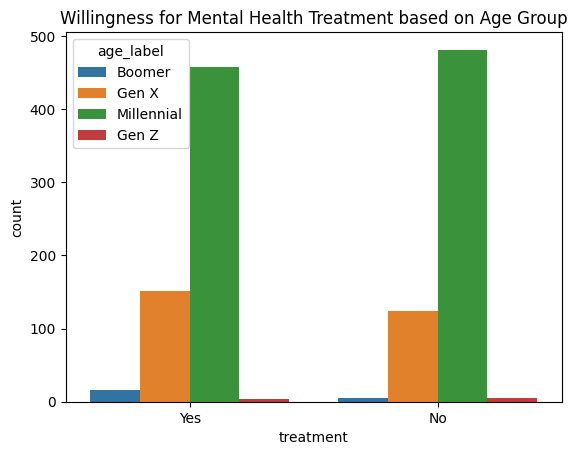

In [44]:
hue_order = ['Boomer', 'Gen X', 'Millennial', 'Gen Z']

sns.countplot(x='treatment', data=proj_df, hue='age_label', hue_order=hue_order).set(title='Willingness for Mental Health Treatment based on Age Group')
plt.show()

Figure 1: In the above countplot, it shows the willingness of tech workers to get treatment for their mental health issues, divided by their age class. Both Boomers and Gen X employees are more likely to get treatment for their mental health than Millennials and Gen Z employees.

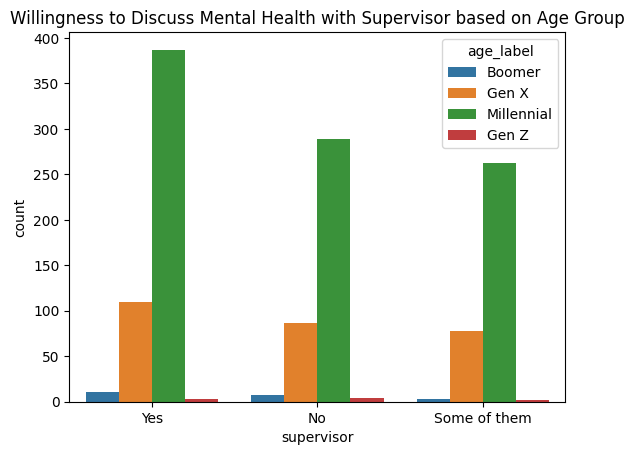

In [22]:
sns.countplot(x='supervisor', data=proj_df, hue='age_label', hue_order=hue_order).set(title='Willingness to Discuss Mental Health with Supervisor based on Age Group')
plt.show()

Figure 2: The above countplot reveals a tech worker's willingness to discuss mental health issues with their supervisors, separated by age generations. Boomers, Gen X, and Millennials answered 'Yes' more than the other answers, while Gen Z answered 'No' more times than the other answers.

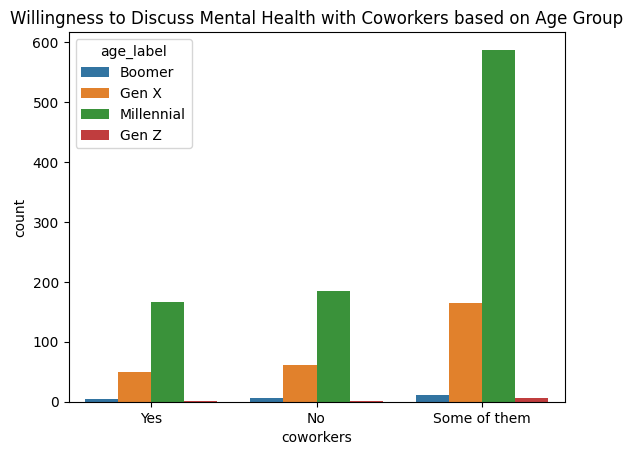

In [23]:
orderedList = list(proj_df['coworkers'].sort_values().unique())
orderedList.remove('Yes')
orderedList.insert(0,'Yes')
sns.countplot(x='coworkers', data=proj_df, hue='age_label', hue_order=hue_order, order=orderedList).set(title='Willingness to Discuss Mental Health with Coworkers based on Age Group')
plt.show()

Figure 3: The above countplot illustrates a tech worker's willingness to discuss mental health issues with their coworkers, separated by age generations. What is shown is that all age generations answered 'Some of them' the most, and 'Yes' the least.

#### Conclusion

Overall, it seems that there is no significant correlation between the age of a tech worker and their willingness to seek treatment for or discuss mental health issues. In fact, it seems that Boomers and Gen X workers are more likely to seek treatment than Millennials and Gen Z which contradicts my expectations. Gen Z workers also appear less likely to discuss mental health issues with their supervisor than other generations. While this may be a trend for Gen Z tech employees, it may also be a result of not having enough Gen Z tech workers answer the survey. The same can be said for Boomer workers. Overall, this was an enlightening analysis showing that while the survey was conducted, there is no evidence that older generations are more stigmatized against mental health issues than younger generations.

---

### Research Question #3 (Eveline)

Creating a dataframe that's best for Eveline's research question, is there a significant age and gender disparity in the mental health of tech employees?

 To begin, we import the data were going to be working on:

In [31]:
df3 = pd.read_csv('../data/processed/eSrinivasanResearchQuestionData.csv')
df3

,Age,Gender,work_interfere,coworkers,supervisor,mental_health_consequence,treatment,gender_alignment,gender_type
0,37.0,F,Often,Some of them,Yes,No,Yes,FA,Cis
1,44.0,M,Rarely,No,No,Maybe,No,MA,Cis
2,32.0,M,Rarely,Yes,Yes,No,No,MA,Cis
3,31.0,M,Often,Some of them,No,Yes,Yes,MA,Cis
4,31.0,M,Never,Some of them,Yes,No,No,MA,Cis
...,...,...,...,...,...,...,...,...,...
1251,26.0,M,NaN,Some of them,Some of them,No,Yes,MA,Cis
1252,32.0,M,Often,Some of them,Yes,No,Yes,MA,Cis
1253,34.0,M,Sometimes,No,No,Yes,Yes,MA,Cis
1254,46.0,F,NaN,No,No,Yes,No,FA,Cis


Before we begin our analysis we need to get an idea of the sample sizes of each group so that we can understand how statistically valid our data on each of the groups is:

<AxesSubplot:xlabel='Gender Type'>

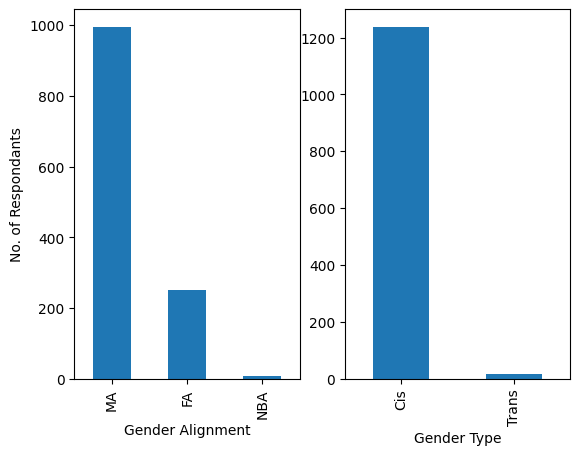

In [32]:
plt.subplot(1,2,1)
plt.xlabel('Gender Alignment')
plt.ylabel('No. of Respondants')
df3.gender_alignment.value_counts().plot.bar()

plt.subplot(1,2,2)
plt.xlabel('Gender Type')
df3.gender_type.value_counts().plot.bar()

As we can see, the number of respondants who identified as Trans is not statistically representative (19 Respondants). Additionally, The number of Non-Binary Aligned indivduals are also not a statistically representative sample(9 Respondants). However for the sake of inclusivity,transparency and throughness we will continue to include these groups in our analysis moving forward.

*Sidenote: We have assigned people who are non-binary but express a preference, e.g 'she/they queer' a gender alignment according to their preference. Inreality these individuals may identify as Non Binary Aligned instead. This reflects a greater need for data collection systems that more accurately reflect their gender experience in general.Asking people if they identify as trans and their alignment if any in addition to their gender as a write in field is suggested*

To begin let us get an understanding of the gender disparities in the outcomes that we are interested in, starting with whether or not individuals feel impacted by their mental health in thier work life.

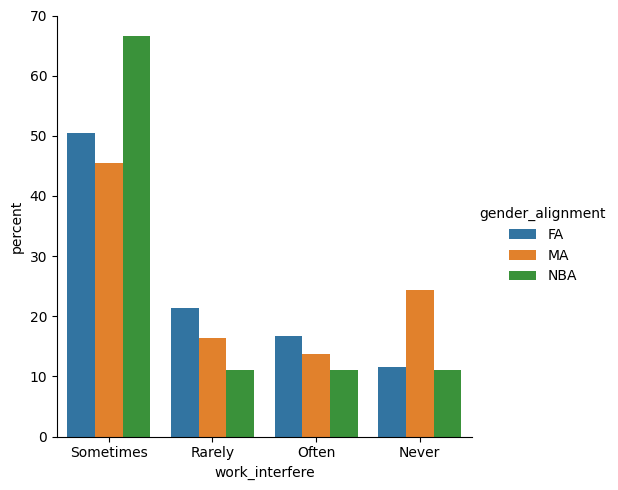

In [34]:
p3.countNormalizedPlot(df3,'gender_alignment','work_interfere')

As expected, Almost across the board, femme-aligned individuals are more likely to say that their mental health affects their work performance. Additionally note that almost twice as many masculine people as femme-aligned individuals say that their mental health Never affects their work performance.

The next metrics we want to look at are the disparities in willingness to discuss thier mental health with coworkers and supervisors.

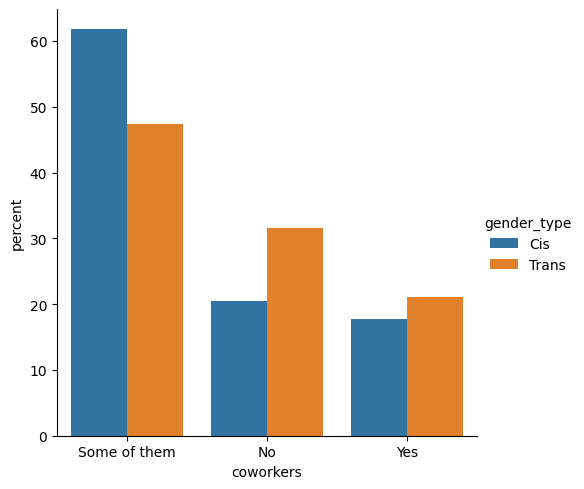

In [36]:
p3.countNormalizedPlot(df3,'gender_type','coworkers')

Furthermore, there is a clear divide between cis and trans indviduals, with trans indviduals significantly likely to say not talk about their mental health with coworkers.

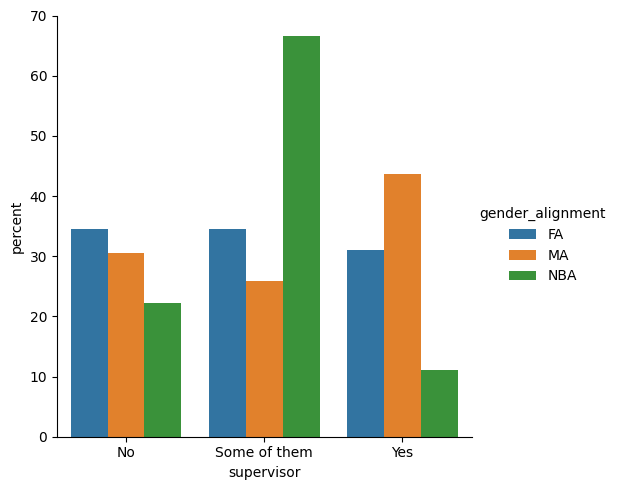

In [38]:
p3.countNormalizedPlot(df3,'gender_alignment','supervisor')

A similar and stronger pattern is observed when we look at the likelihood of talking to thier direct supervisors. Femme aligned people are significantly less likely to talk to thier supervisor about their mental health and when they do are also significantly likely to be more selective.

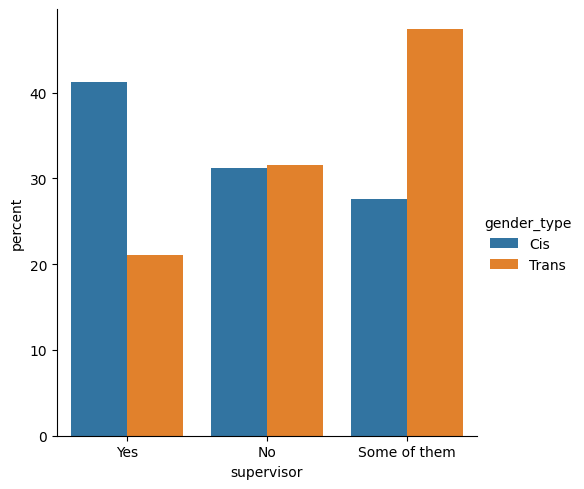

In [39]:
p3.countNormalizedPlot(df3,'gender_type','supervisor')

The pattern is even stronger when we seperate the data by gender type. Trans individuals are significantly more selective than cis people reflecting a need for more inclusive management structures in the tech industry. 

Since the pattern is so strong, it might be interesting to look at the gender disparity on whether the individual thinks discussing mental health with their employer will have negative connotations.

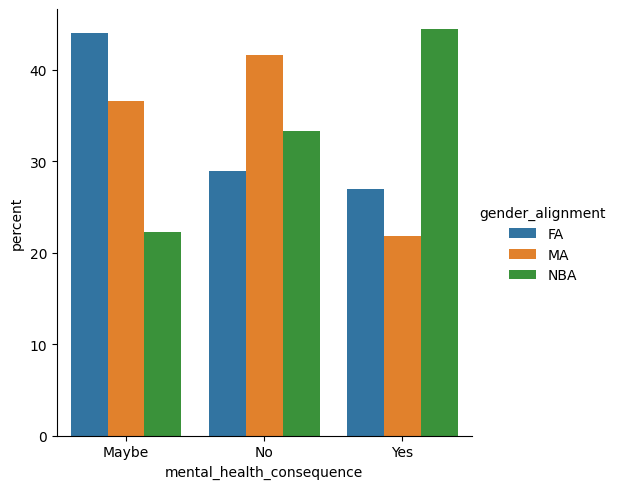

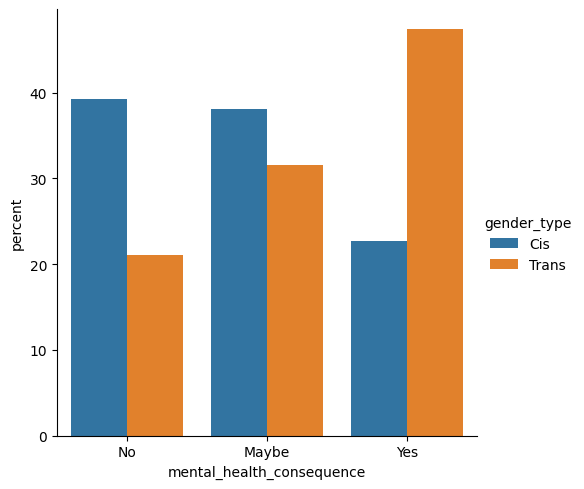

In [40]:
p3.countNormalizedPlot(df3,'gender_alignment','mental_health_consequence')
p3.countNormalizedPlot(df3,'gender_type','mental_health_consequence')

As expected the pattern inferred from the data above is held with regards to consequence to bringing up mental health with their employers. Femme-aligned individuals are far more likely to expect consequence and are also significantly more unsure of the likelihood of consequence than masc aligned individuals. There is also an extremely strong expectation of consequence from non-binary individuals and additonally, that pattern carries forward to out gender type analysis. Trans people are more than twice as likely to expect strong consequence for bringing up mental health with their employer.

If we look at more nuanced data by looking at gender directly instead of aggregating it:

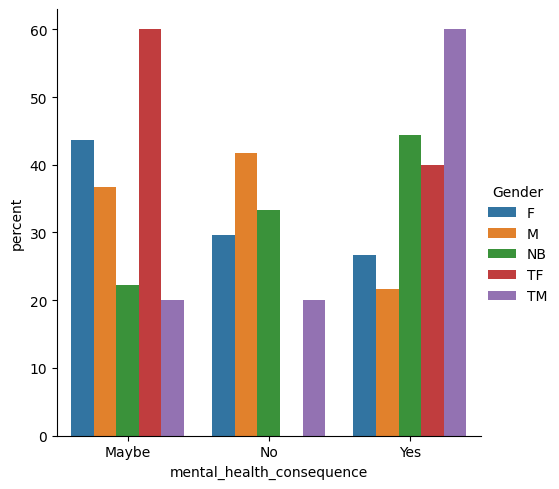

In [41]:
p3.countNormalizedPlot(df3,'Gender','mental_health_consequence')

We see that ALL Trans and femme aligned individuals are either unsure or expect consequences for discussing mental health. This reflects a strong presence of trans-misogyny in tech spaces.

Finally we want to sanity check our findings by looking at disparity in use of mental health resources.

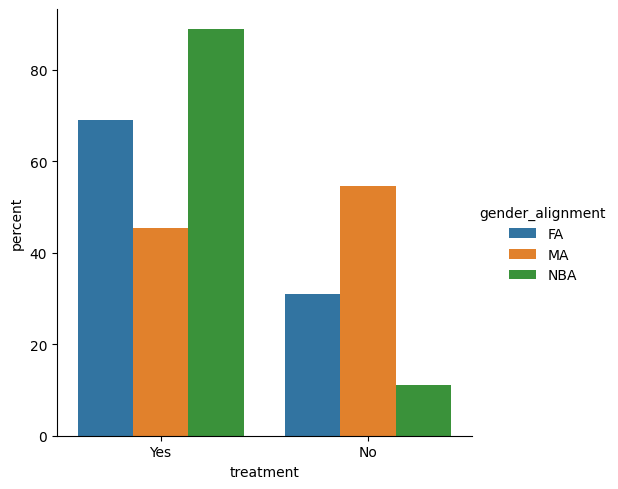

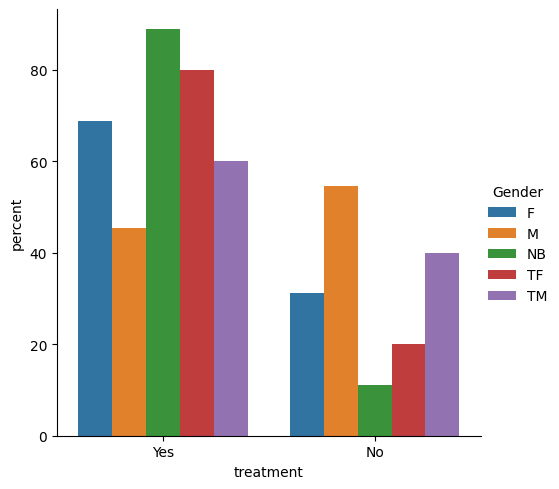

In [42]:
p3.countNormalizedPlot(df3,'gender_alignment','treatment')
p3.countNormalizedPlot(df3,'Gender','treatment')

As we can see the patterns are held with individuals use of mental health resource with femme individuals are more likely to have sought treatment for their mental health. An intersting point of note is also that masc-aligned trans people far less likely to have sought treatment than femme-aligned trans people. Unfortunately we cannot determine whether this is a reflection of toxic-masculinity or trans-misogyny. It is likely a combination of both factors, and is worth investigating.

#### Conclusion
 The findings suggest that the tech industry is significantly biased against femme-aligned and trans-individuals. Additonally the worst outcomes are reflected among trans-femme indviduals reflecting a pervasive trans-misogyny issue. Additinally, we see that power dynamics play a big part, those in supervisory roles or in other postions of power need to do a better job of making tech spaces more inclusive towards trans and femme-aligned individuals while also creating fairer and more inclusive systems within tech.  